In [13]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [14]:
X_data = np.linspace(0,1,1000000) # 1 millón de puntos
y_data = 5 * X_data + 0.04 + np.random.randn(len(X_data))

In [15]:
x_df = pd.DataFrame(data=X_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_data, columns=['Y'])
my_data = pd.concat([x_df, y_df], axis=1)
my_data.head()

,X Data,Y
0,0.000000,-0.830142
1,0.000001,-0.376774
2,0.000002,-1.657340
3,0.000003,0.286073
4,0.000004,-2.033165


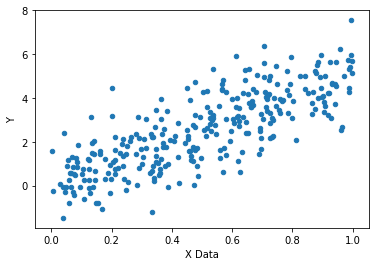

In [16]:
my_data.sample(n=300).plot(kind='scatter',x='X Data',y='Y') #pintamos un submuestreo ya que el sistema fallaría con el millón de datos a la vez
plt.show()

In [18]:
model = Sequential()
model.add(Dense(1, input_dim=1))

In [19]:
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

dict_keys(['loss', 'val_loss'])


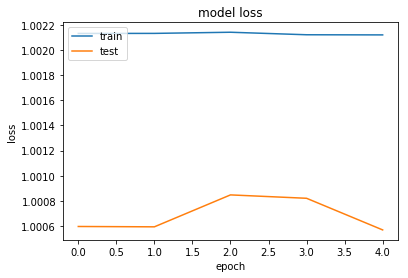

In [22]:
# Fit the model
history = model.fit(X_data, y_data, validation_split=0.33, epochs=5, batch_size=128, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_m = model.get_weights()[0]
model_b = model.get_weights()[1]
model.get_weights()

[array([[ 5.00645161]], dtype=float32), array([ 0.03365948], dtype=float32)]

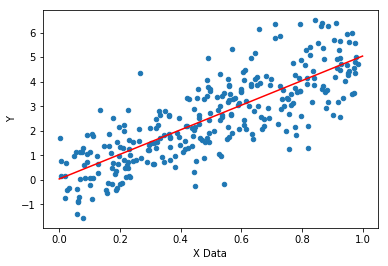

In [43]:
y_hat=X_data*model_m + model_b

my_data.sample(300).plot(kind='scatter', x='X Data', y='Y')
plt.plot(X_data,y_hat.reshape(-1),'r')
plt.show()

In [62]:
X_data = np.linspace(-1,2,1000000) # 1 millón de puntos
y_data = 10 * X_data**2- 12*X_data + 0.04 + np.random.randn(len(X_data))

In [63]:
x_df = pd.DataFrame(data=X_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_data, columns=['Y'])
my_data = pd.concat([x_df, y_df], axis=1)
my_data.head()

,X Data,Y
0,-1.000000,21.494073
1,-0.999997,22.497238
2,-0.999994,21.444986
3,-0.999991,21.732883
4,-0.999988,23.422106


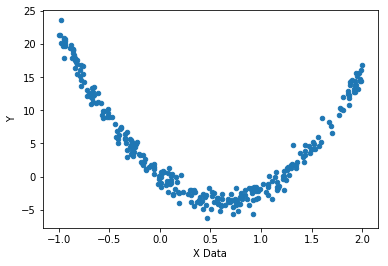

In [64]:
my_data.sample(n=300).plot(kind='scatter',x='X Data',y='Y') #pintamos un submuestreo ya que el sistema fallaría con el millón de datos a la vez
plt.show()

dict_keys(['loss', 'val_loss'])


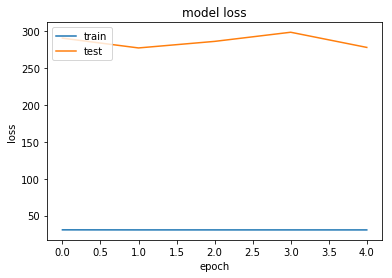

In [77]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Dense(units=45))
model.add(Dense(units=1))
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# Fit the model
history = model.fit(X_data, y_data, validation_split=0.1, epochs=5, batch_size=128, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

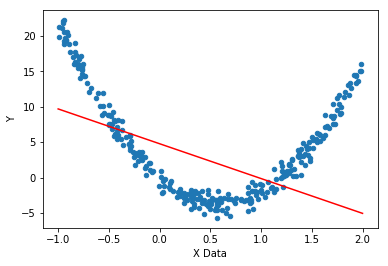

In [78]:
y_hat=model.predict(X_data)

my_data.sample(300).plot(kind='scatter', x='X Data', y='Y')
plt.plot(X_data,y_hat.reshape(-1),'r')
plt.show()

Train on 900000 samples, validate on 100000 samples
Epoch 1/5
900000/900000 [==============================] - 9s 10us/step - loss: 1.4442 - val_loss: 4.1651
Epoch 2/5
900000/900000 [==============================] - 9s 10us/step - loss: 1.0251 - val_loss: 5.3719
Epoch 3/5
900000/900000 [==============================] - 9s 10us/step - loss: 1.0223 - val_loss: 4.8329
Epoch 4/5
900000/900000 [==============================] - 8s 9us/step - loss: 1.0208 - val_loss: 4.8846
Epoch 5/5
900000/900000 [==============================] - 11s 12us/step - loss: 1.0189 - val_loss: 1.8802
dict_keys(['loss', 'val_loss'])


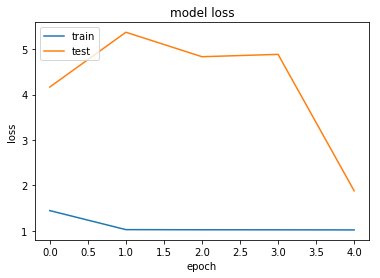

In [75]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=45))
model.add(Activation('relu'))
model.add(Dense(units=1))

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# Fit the model
history = model.fit(X_data, y_data, validation_split=0.1, epochs=5, batch_size=128, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

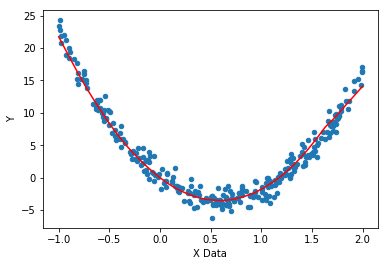

In [76]:
y_hat=model.predict(X_data)

my_data.sample(300).plot(kind='scatter', x='X Data', y='Y')
plt.plot(X_data,y_hat.reshape(-1),'r')
plt.show()